### Introduction

* `dplyr` is fine if we want to use just one LHS item to predict a single RHS item  
* What about multiple LHS items?? 
* Best rule among all RHS items?? 
* Need a better "search" algorithm 

### Automation with `arules`

Automate the process with the arules library

In [5]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(arules)

To use `arules` package, columns must be factors:

In [ ]:
library(dplyr)

In [7]:
groceries <- read.csv('https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/data/Groceries.csv')
head(groceries)

,frankfurter,sausage,liver.loaf,ham,meat,finished.products,organic.sausage,chicken,turkey,pork,⋯,candles,light.bulbs,sound.storage.medium,newspapers,photo.film,pot.plants,flower.soil.fertilizer,flower..seeds.,shopping.bags,bags
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Changing to `factor` columns

Notice that the columns are all set to the type `int`.  The `apriori` library requires that we recode all of our columns as factors, which can be accomplished using the following code.

In [9]:
groc_factors <-
  groceries %>%
  mutate_if(is.integer, as.factor)


head(groc_factors)

,frankfurter,sausage,liver.loaf,ham,meat,finished.products,organic.sausage,chicken,turkey,pork,⋯,candles,light.bulbs,sound.storage.medium,newspapers,photo.film,pot.plants,flower.soil.fertilizer,flower..seeds.,shopping.bags,bags
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Compute the rules


* Use `apriori` function to compute rules; `parameter = ` to set min values
* Default: `parameter = list(support = .1, confidence = .8, maxlen = 10)`
    * `maxlen = 2` sets one item on LHS, one on RHS
    *  **Support filter refers to the JOINT support!  *SUPPORT{LHS, RHS}***

In [10]:
groc_rules <- apriori(groc_factors, 
                      parameter = list(supp = 0.05,
                                       conf = 0.2,
                                       maxlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.05      1
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 491 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 9835 transaction(s)] done [0.13s].
sorting and recoding items ... [197 item(s)] done [0.06s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(groc_factors, parameter = list(supp = 0.05, conf = 0.2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.26s].
writing ... [33246 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


### Investigate

* `apriori` output are of S4 class `"rules"`
* use `@` symbols like `$`, or as functions

In [11]:
class(groc_rules)

[1] "rules"
attr(,"package")
[1] "arules"

In [12]:
str(groc_rules)

Formal class 'rules' [package "arules"] with 4 slots
  ..@ lhs    :Formal class 'itemMatrix' [package "arules"] with 3 slots
  .. .. ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. .. .. ..@ i       : int [1:33076] 305 305 305 305 305 305 305 305 305 305 ...
  .. .. .. .. ..@ p       : int [1:33247] 0 0 0 0 0 0 0 0 0 0 ...
  .. .. .. .. ..@ Dim     : int [1:2] 338 33246
  .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. ..$ : NULL
  .. .. .. .. ..@ factors : list()
  .. .. ..@ itemInfo   :'data.frame':	338 obs. of  3 variables:
  .. .. .. ..$ labels   : chr [1:338] "frankfurter=0" "frankfurter=1" "sausage=0" "sausage=1" ...
  .. .. .. ..$ variables: Factor w/ 169 levels "abrasive.cleaner",..: 56 56 131 131 85 85 67 67 91 91 ...
  .. .. .. ..$ levels   : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 1 2 ...
  .. .. ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables
  ..@ rhs    :Formal class 'itemMatrix' [package "arules"] 

### Inspect

Use `inspect()` to get a feel for the structure:

In [13]:
inspect(groc_rules[1:10]) 

     lhs    rhs                  support   confidence coverage lift count
[1]  {}  => {whole.milk=1}       0.2555160 0.2555160  1        1    2513 
[2]  {}  => {whole.milk=0}       0.7444840 0.7444840  1        1    7322 
[3]  {}  => {other.vegetables=0} 0.8065074 0.8065074  1        1    7932 
[4]  {}  => {rolls.buns=0}       0.8160651 0.8160651  1        1    8026 
[5]  {}  => {soda=0}             0.8256228 0.8256228  1        1    8120 
[6]  {}  => {yogurt=0}           0.8604982 0.8604982  1        1    8463 
[7]  {}  => {bottled.water=0}    0.8894764 0.8894764  1        1    8748 
[8]  {}  => {root.vegetables=0}  0.8910015 0.8910015  1        1    8763 
[9]  {}  => {tropical.fruit=0}   0.8950686 0.8950686  1        1    8803 
[10] {}  => {shopping.bags=0}    0.9014743 0.9014743  1        1    8866 


**Remember, `support` column is the JOINT support of {LHS,RHS}**

### Pull out the rules with whole.milk

* Use `subset()` function to filter rules
* Use `head(rules, n= , by = , decreasing = )` to select top-n and bottom-n rules 

In [14]:
milk_rules <-  subset(groc_rules, subset = rhs %in% 'whole.milk=1') 
inspect(head(milk_rules, n = 5, by = 'lift'))

    lhs                     rhs            support    confidence coverage 
[1] {yogurt=1}           => {whole.milk=1} 0.05602440 0.4016035  0.1395018
[2] {other.vegetables=1} => {whole.milk=1} 0.07483477 0.3867578  0.1934926
[3] {rolls.buns=1}       => {whole.milk=1} 0.05663447 0.3079049  0.1839349
[4] {canned.beer=0}      => {whole.milk=1} 0.24667006 0.2674457  0.9223183
[5] {soda=0}             => {whole.milk=1} 0.21545501 0.2609606  0.8256228
    lift     count
[1] 1.571735  551 
[2] 1.513634  736 
[3] 1.205032  557 
[4] 1.046689 2426 
[5] 1.021308 2119 


In [15]:
inspect(head(milk_rules, n = 5, by = 'lift', decreasing = FALSE))

    lhs                       rhs            support   confidence coverage 
[1] {other.vegetables=0}   => {whole.milk=1} 0.1806812 0.2240292  0.8065074
[2] {yogurt=0}             => {whole.milk=1} 0.1994916 0.2318327  0.8604982
[3] {root.vegetables=0}    => {whole.milk=1} 0.2066090 0.2318841  0.8910015
[4] {tropical.fruit=0}     => {whole.milk=1} 0.2132181 0.2382142  0.8950686
[5] {whipped.sour.cream=0} => {whole.milk=1} 0.2232842 0.2405257  0.9283172
    lift      count
[1] 0.8767719 1777 
[2] 0.9073118 1962 
[3] 0.9075128 2032 
[4] 0.9322869 2097 
[5] 0.9413333 2196 


### Using piping

In [16]:
groc_rules %>%
  subset(rhs %in% 'whole.milk=1') %>%
  head(10, by = 'lift') %>% 
  inspect()

     lhs                     rhs            support    confidence coverage 
[1]  {yogurt=1}           => {whole.milk=1} 0.05602440 0.4016035  0.1395018
[2]  {other.vegetables=1} => {whole.milk=1} 0.07483477 0.3867578  0.1934926
[3]  {rolls.buns=1}       => {whole.milk=1} 0.05663447 0.3079049  0.1839349
[4]  {canned.beer=0}      => {whole.milk=1} 0.24667006 0.2674457  0.9223183
[5]  {soda=0}             => {whole.milk=1} 0.21545501 0.2609606  0.8256228
[6]  {UHT.milk=0}         => {whole.milk=1} 0.25155058 0.2602567  0.9665480
[7]  {white.wine=0}       => {whole.milk=1} 0.25287239 0.2577736  0.9809863
[8]  {liquor=0}           => {whole.milk=1} 0.25490595 0.2577627  0.9889171
[9]  {red.blush.wine=0}   => {whole.milk=1} 0.25155058 0.2564794  0.9807829
[10] {shopping.bags=0}    => {whole.milk=1} 0.23101169 0.2562599  0.9014743
     lift     count
[1]  1.571735  551 
[2]  1.513634  736 
[3]  1.205032  557 
[4]  1.046689 2426 
[5]  1.021308 2119 
[6]  1.018553 2474 
[7]  1.008836 2487 
[8] 

### Considering more than one item on LHS the number of rules

In [17]:
#control = list(verbose = FALSE) to suppress progress printing 
groc_rules2 <- apriori(groc_factors, 
                      parameter = list(supp = 0.05,
                                       conf = 0.2,
                                       maxlen = 4), 
                      control = list(verbose = FALSE))

#### Finding the 10 best rules for predicting whole milk, considering rules with at least 8% support.

In [18]:
milk_rules_8pct <-  subset(groc_rules2, subset = rhs %in% 'whole.milk=1' & support > .08) 
milk_rules_8pct %>% 
  head(n=10, by = 'lift') %>% 
  inspect() 

     lhs                                  rhs            support   confidence
[1]  {soda=0,canned.beer=0}            => {whole.milk=1} 0.2096594 0.2752269 
[2]  {UHT.milk=0,canned.beer=0}        => {whole.milk=1} 0.2428063 0.2725716 
[3]  {canned.beer=0,liquor=0}          => {whole.milk=1} 0.2462633 0.2700111 
[4]  {canned.beer=0,white.wine=0}      => {whole.milk=1} 0.2442298 0.2698573 
[5]  {bottled.beer=0,canned.beer=0}    => {whole.milk=1} 0.2272496 0.2691150 
[6]  {ice.cream=0,canned.beer=0}       => {whole.milk=1} 0.2410778 0.2683341 
[7]  {canned.beer=0,specialty.bar=0}   => {whole.milk=1} 0.2404677 0.2682318 
[8]  {canned.beer=0,red.blush.wine=0}  => {whole.milk=1} 0.2428063 0.2681037 
[9]  {misc..beverages=0,canned.beer=0} => {whole.milk=1} 0.2401627 0.2679828 
[10] {canned.beer=0,brandy=0}          => {whole.milk=1} 0.2461617 0.2679283 
     coverage  lift     count
[1]  0.7617692 1.077142 2062 
[2]  0.8907982 1.066750 2388 
[3]  0.9120488 1.056729 2422 
[4]  0.9050330 1.05612

#### Finding the 10 best rules overall, among rules with at least 10% support. 

In [19]:
rules_10pct <-  subset(groc_rules2, subset = support > .1) 
rules_10pct %>% 
  head(10, by = 'lift') %>% 
  inspect()

     lhs                     rhs                    support confidence  coverage     lift count
[1]  {other.vegetables=0,                                                                      
      soda=1}             => {whole.milk=0}       0.1155058  0.8155061 0.1416370 1.095398  1136
[2]  {soda=0,                                                                                  
      canned.beer=0}      => {whole.milk=1}       0.2096594  0.2752269 0.7617692 1.077142  2062
[3]  {yogurt=0,                                                                                
      soda=1}             => {whole.milk=0}       0.1174377  0.7987552 0.1470259 1.072898  1155
[4]  {root.vegetables=0,                                                                       
      whole.milk=0}       => {other.vegetables=0} 0.5899339  0.8619819 0.6843925 1.068784  5802
[5]  {root.vegetables=0,                                                                       
      soda=1}             => {whole.milk

> Interpretation of lift = 1.095: *Knowing that vegetables were NOT purchased and soda WAS purchased increases the likelihood that milk was NOT purchased by 9.5%, relative to the overall rate at which milk was NOT purchased.*

### Visualizing association rules


The `arulesViz` package can be used to visualize and interact with individual rules 

In [20]:
install.packages('arulesViz')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘zoo’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘lmtest’, ‘data.table’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘plotly’, ‘visNetwork’




In [21]:
library(arulesViz)

#### Scatter plot with `color = lift`

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



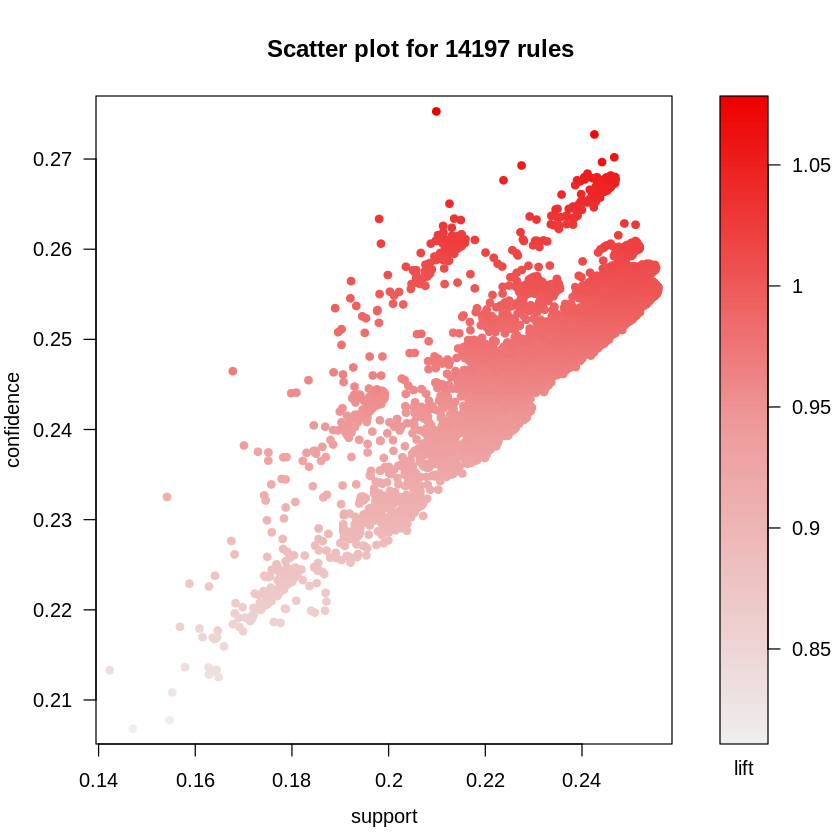

In [22]:
plot(milk_rules_8pct)

#### Rearranged scatter plot with `color = support`

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



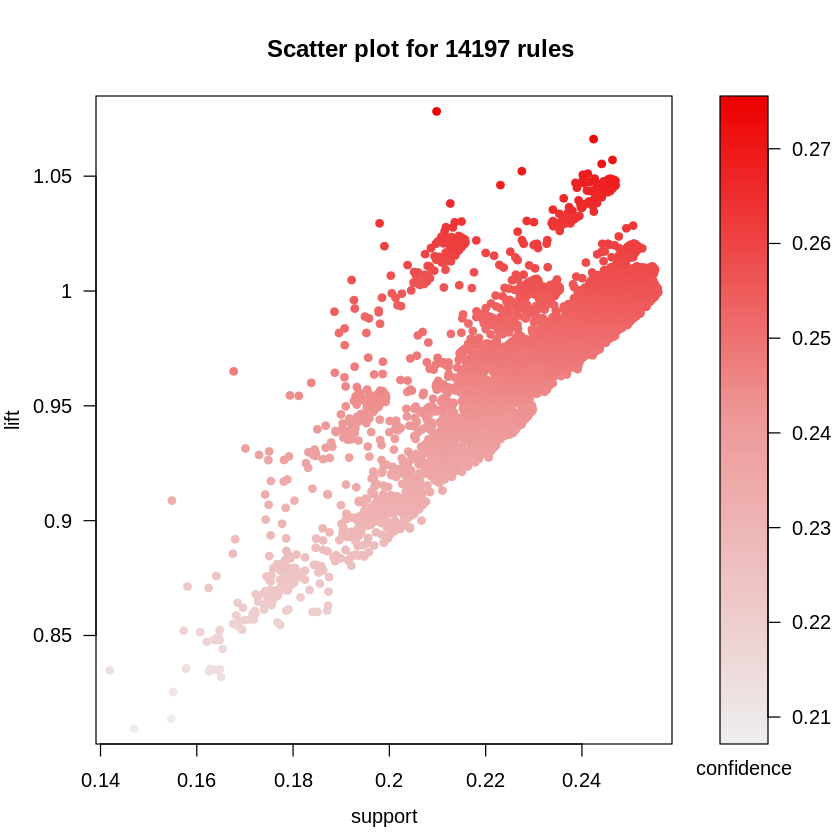

In [23]:
#change the visual encoding:
plot(milk_rules_8pct, measure = c('support','lift'), shading = 'confidence')

#### Interactive plots in RStudio

Use `engine = 'interactive'` to highlight and inspect rules; double-clicking to shade then clicking "inspect" :

In [ ]:
# Won't work in Colab :(
plot(milk_rules_8pct, measure = c('support','lift'), shading = 'confidence', 
     engine = 'interactive')

<img width="400" src="https://github.com/WSU-DataScience/DSCI_210_R_notebooks/raw/main/img/interactive-aviz.png"> 

#### Grouped matrix plot

Use `method = 'grouped'` useful for identifying small numbers of quality rules with various `RHS`:

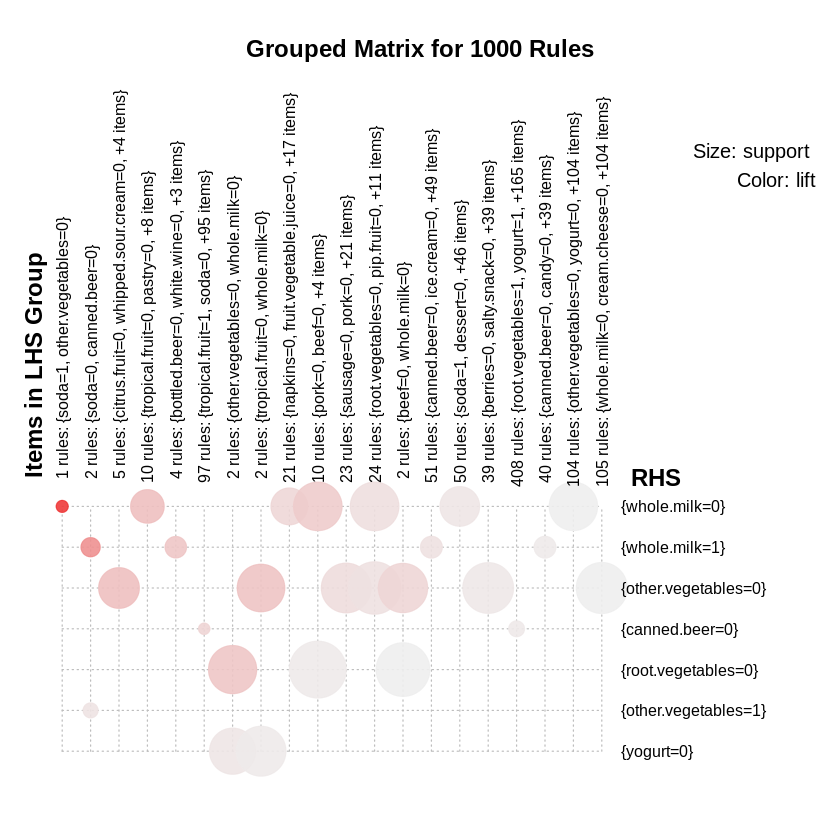

In [25]:
top1000 <- rules_10pct %>% 
  head(1000, by = 'lift') 
plot(top1000, method = 'grouped')

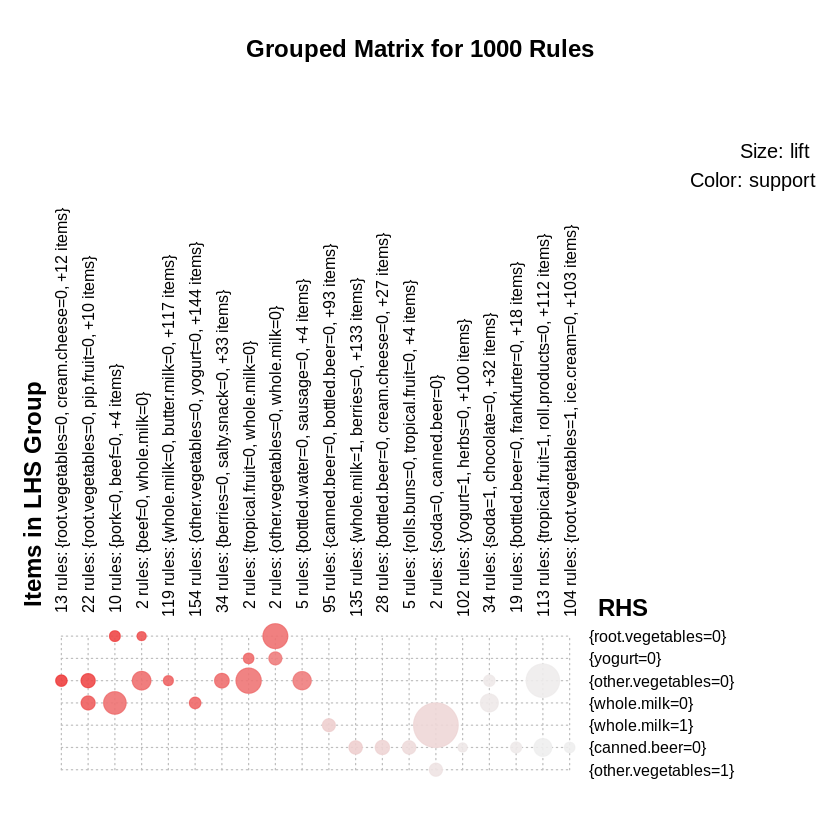

In [26]:
plot(top1000, method = 'grouped', measure = 'lift',shading = 'support')

#### Plotting rules as a graph

Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


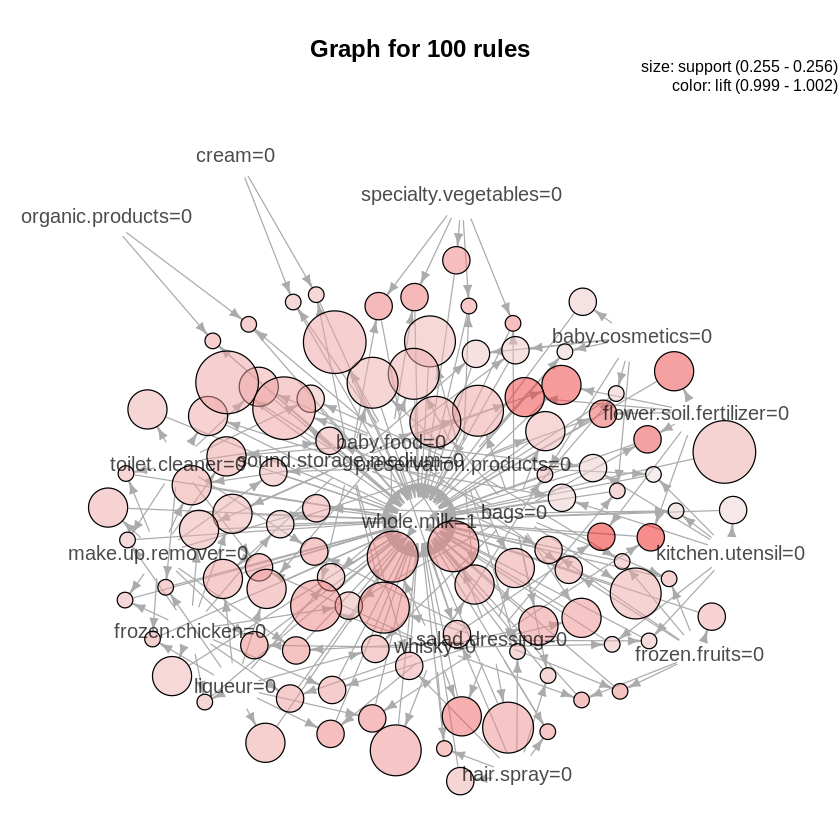

In [32]:
plot(milk_rules_8pct, method = "graph")

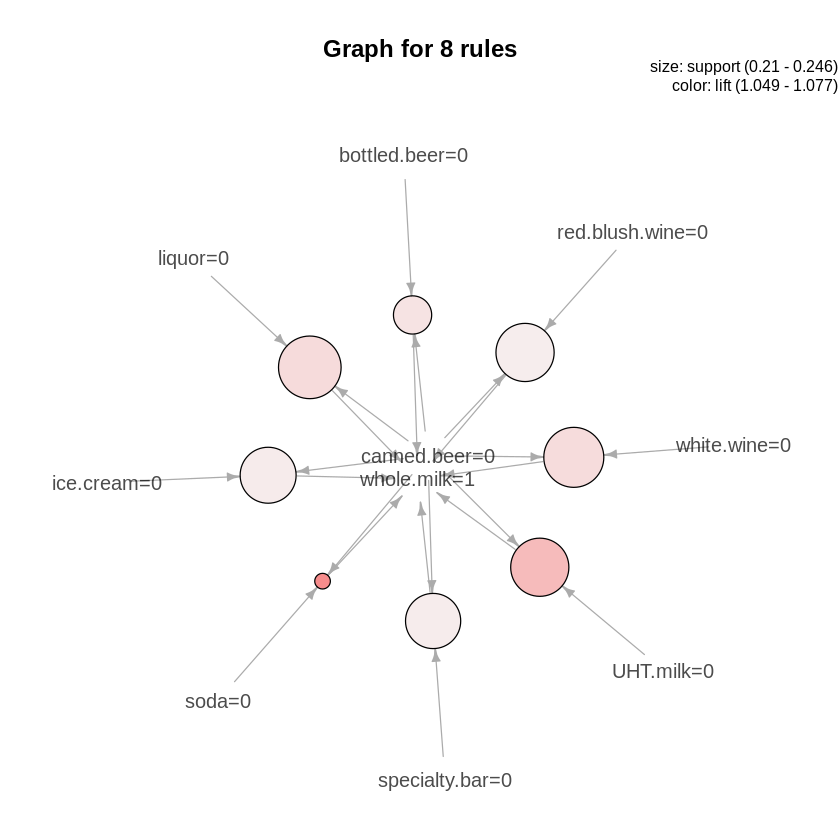

In [38]:
milk_rules_8pct %>% 
  head(8, by = 'lift') %>% 
  plot(method = "graph")